## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [5]:
customer_set = pd.read_csv('Mall_Customers.csv')
customer_set = customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})
print(customer_set.head())

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [7]:
print(customer_set.columns)

print(customer_set.shape)

print(customer_set.describe())

print(customer_set.isna().sum())


Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')
(200, 5)
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
customer_set = customer_set.drop('CustomerID',axis=1)

   Gender  Age  Income  SpendingScore
0    Male   19      15             39
1    Male   21      15             81
2  Female   20      16              6
3  Female   23      16             77
4  Female   31      17             40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

NameError: name 'customer_set' is not defined

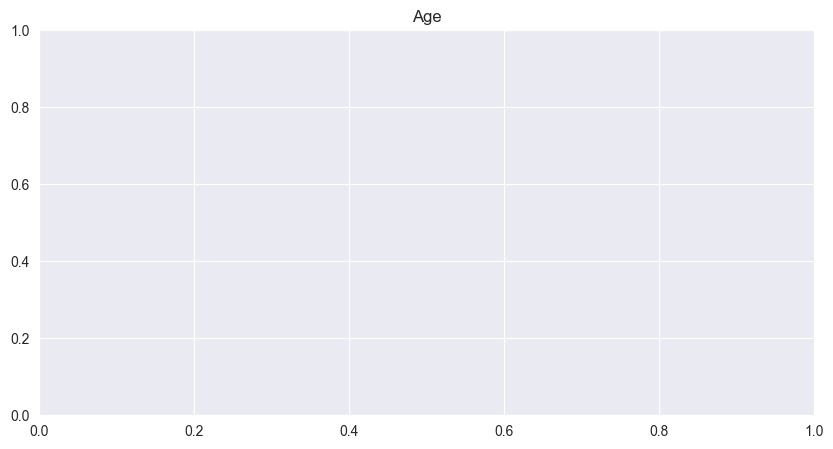

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(customer_set['Age'], bins=15, color='salmon')
axs[0].set_title("Age")
axs[0].set_xlabel('Age')

axs[1].hist(customer_set['Income'], bins=15, color='blue')
axs[1].set_title("Income")
axs[1].set_xlabel('Income')

axs[2].hist(customer_set['SpendingScore'], bins=15, color='orange')
axs[2].set_title("SpendingScore")
axs[2].set_xlabel('SpendingScore')

plt.tight_layout()
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

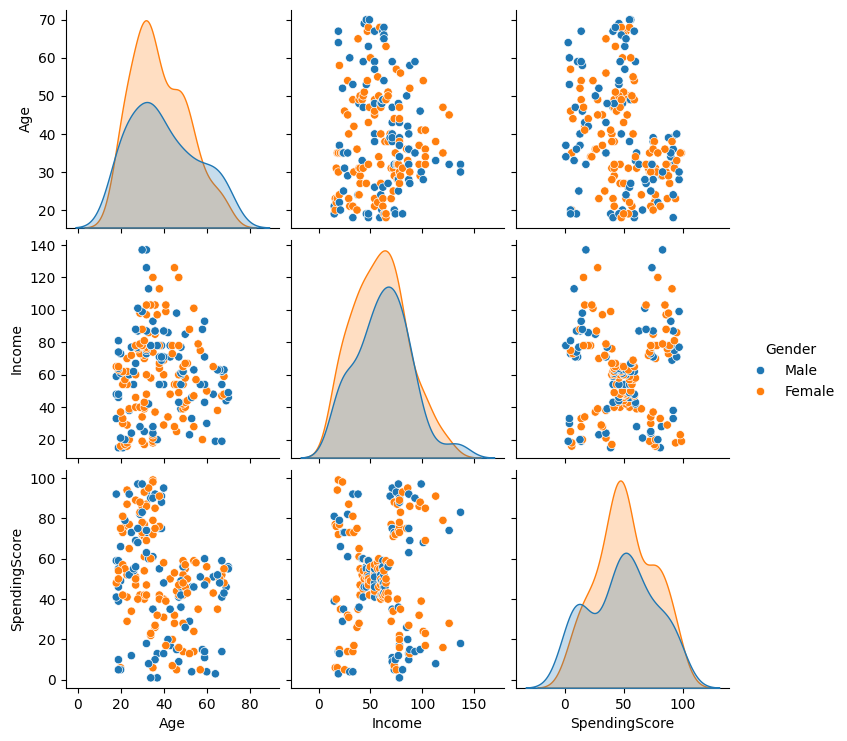

In [17]:
sns.pairplot(customer_set, hue='Gender')
plt.show()

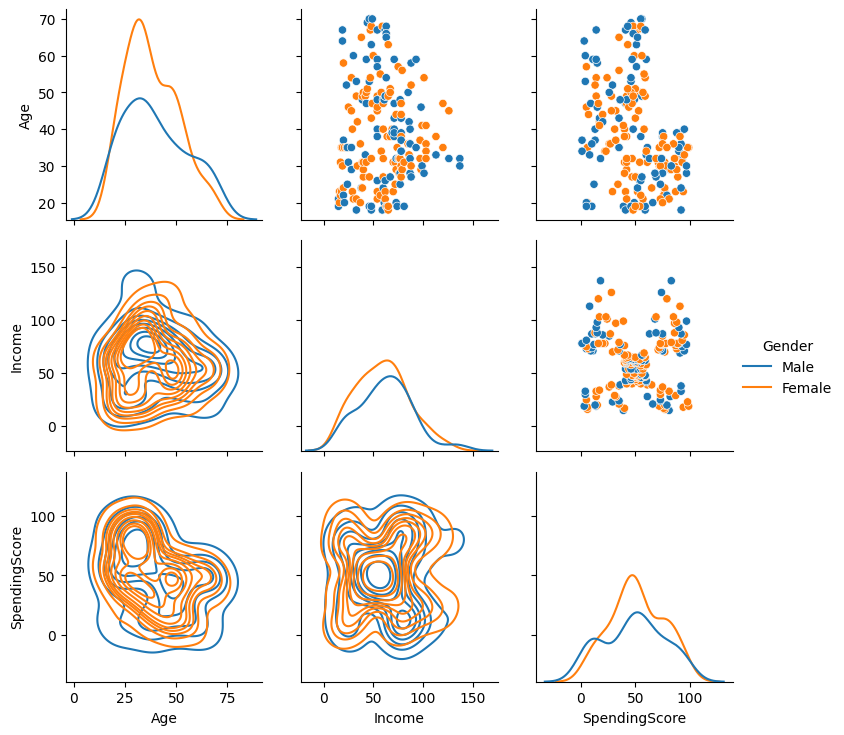

In [18]:
gender = sns.PairGrid(customer_set, hue='Gender')
gender.map_upper(sns.scatterplot)
gender.map_diag(sns.kdeplot)
gender.map_lower(sns.kdeplot, lw=1)
gender.add_legend()

plt.show()

**Висновки з 1-4 завдання (детальні)**

The dataset comprises 200 observations and 5 attributes, including "Gender," "Age," "Income," and "SpendingScore." There are no missing values in the dataset. Upon removing the non-contributing attribute "CustomerID," distribution plots were generated for Age, Income, and SpendingScore. Further examination through pairwise analysis, particularly Gender against other variables, revealed a singular cluster in relationships such as Income:Age, SpendingScore:Age, Age:Income, and Age:SpendingScore. However, in the relationships involving SpendingScore:Age and Age:SpendingScore, the possibility of a bifurcation into two clusters was observed.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

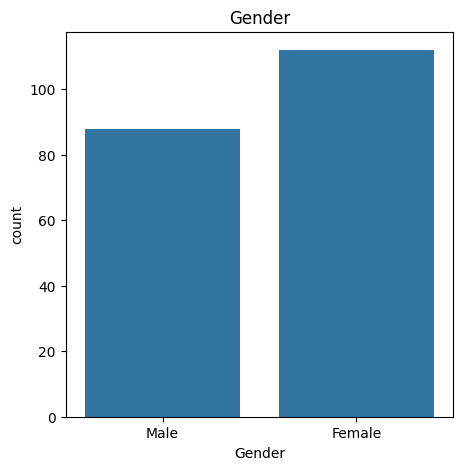

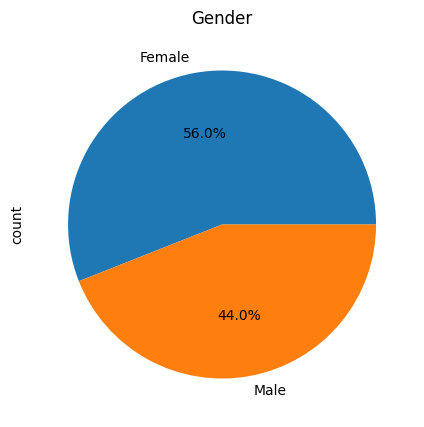

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Gender', data=customer_set, ax=axs[0])
axs[0].set_title('Gender')

customer_set['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Gender')

plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

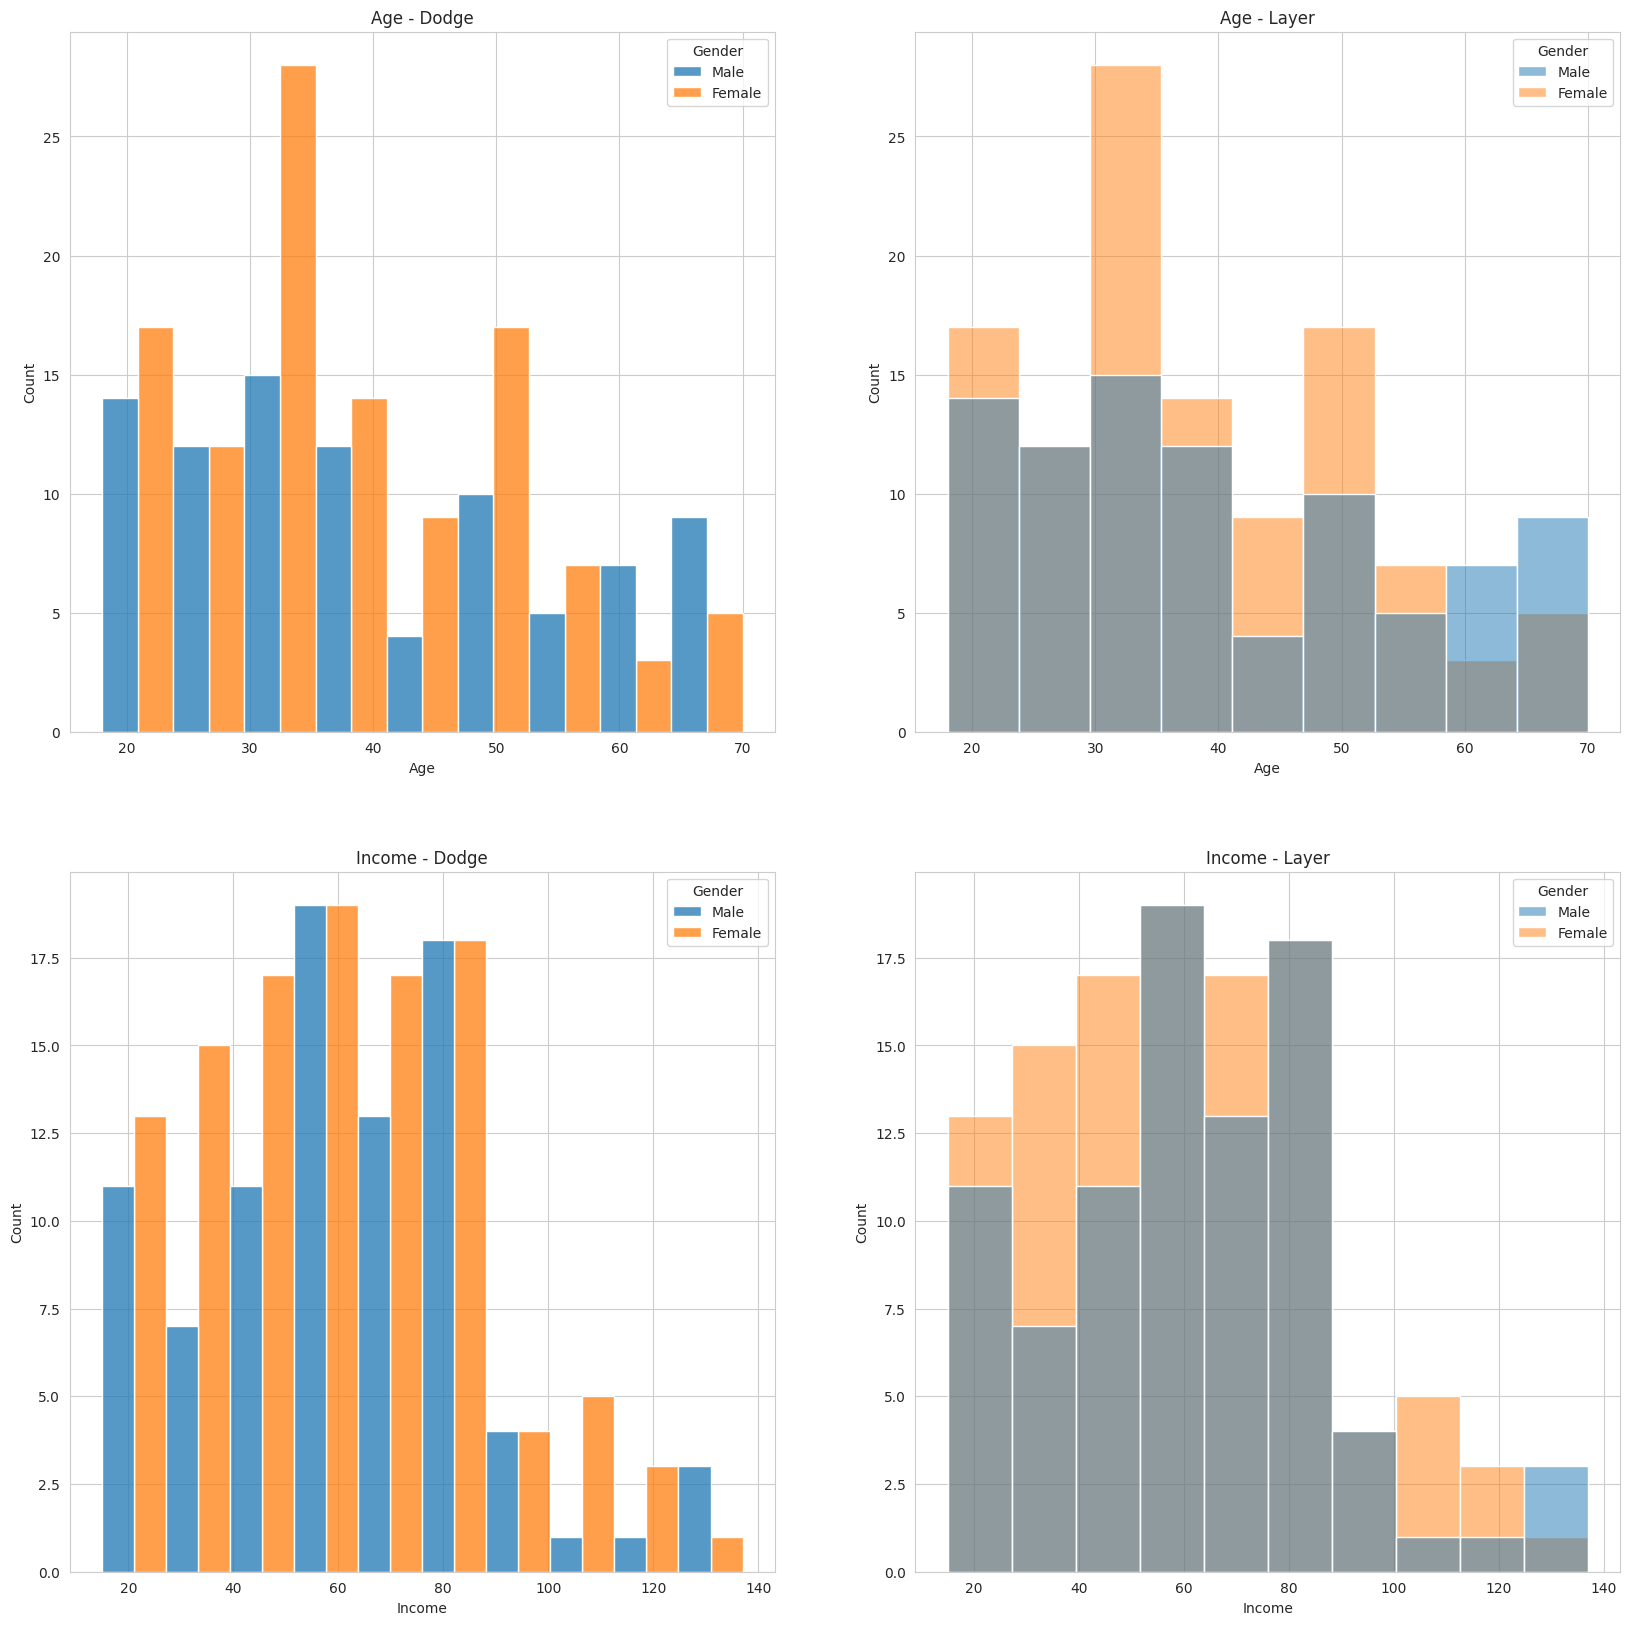

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(data, x, hue, multiple, title, ax):
    sns.histplot(data=data, x=x, hue=hue, multiple=multiple, ax=ax)
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
sns.set_style('whitegrid')

plot_histogram(customer_set, 'Age', 'Gender', 'dodge', 'Age - Dodge', axs[0, 0])
plot_histogram(customer_set, 'Age', 'Gender', 'layer', 'Age - Layer', axs[0, 1])
plot_histogram(customer_set, 'Income', 'Gender', 'dodge', 'Income - Dodge', axs[1, 0])
plot_histogram(customer_set, 'Income', 'Gender', 'layer', 'Income - Layer', axs[1, 1])

plt.tight_layout()
plt.show()


**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



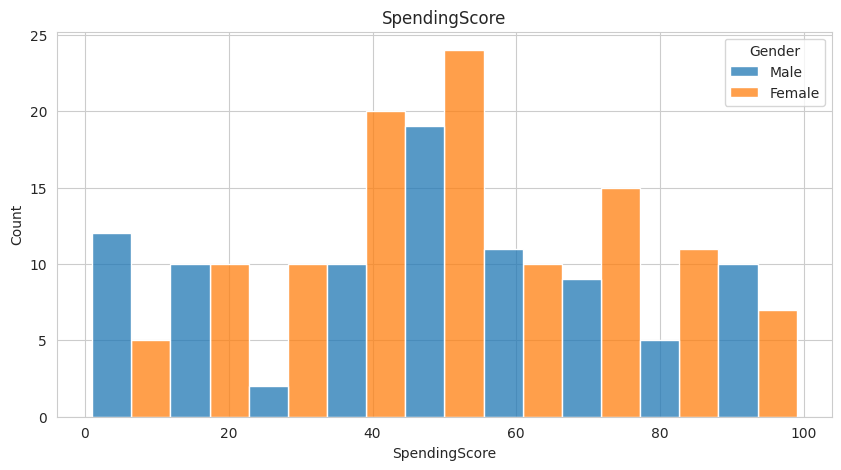

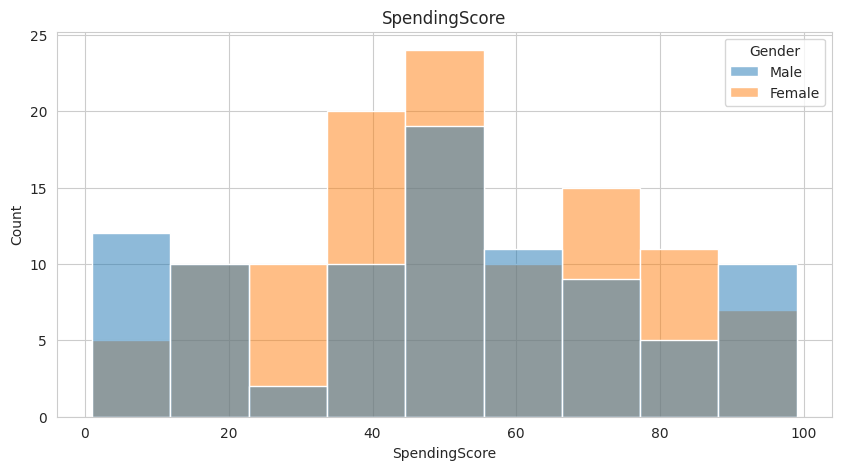

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', ax=axs[0])
axs[0].set_title('SpendingScore - Dodge')

sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', ax=axs[1])
axs[1].set_title('SpendingScore - Layer')

plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

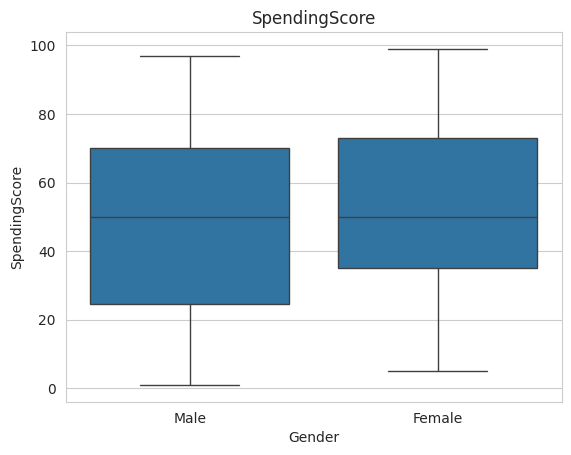

In [26]:
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set)

plt.title('SpendingScore')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
3. Чи є різниця між витратами у чоловіків та жінок?

1.The ratio of groups: women - 0.56, men - 0.44.

2.Based on the schedule from task 7, 3 groups of costs are distinguished: up to 40 (even distribution). Men's spending is more stable than women's.

3.Men's expenses are smaller and more stable than women's.


## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**- оскільки ця змінна більше не потрібна для подального аналізу;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

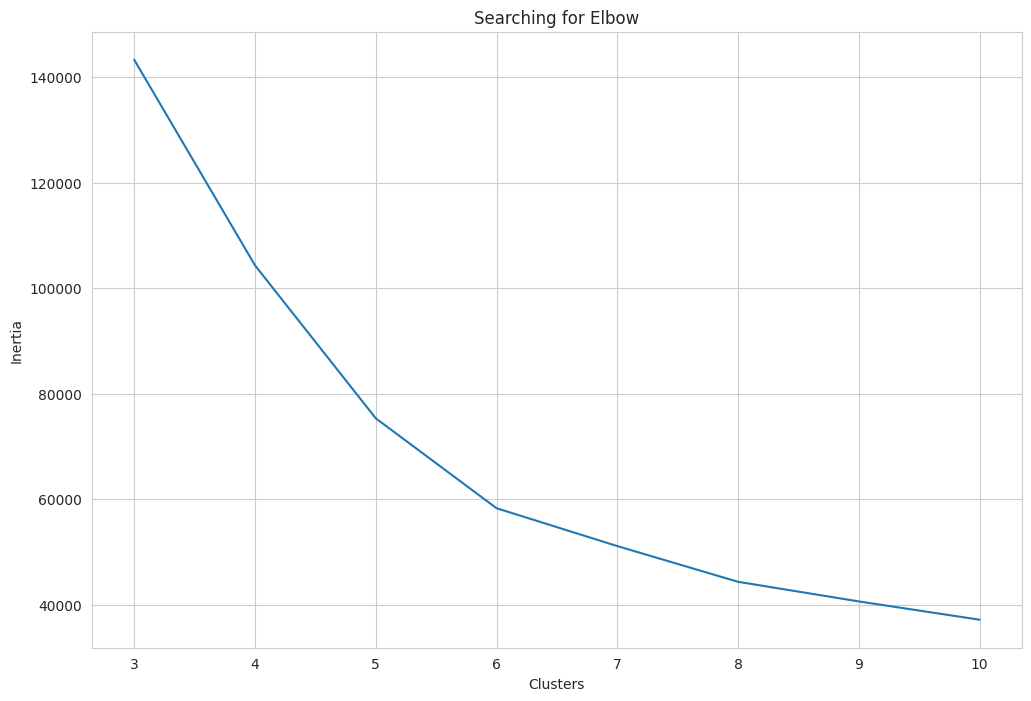

In [27]:
def calculate_clusters(X, min_clusters, max_clusters):
    clusters = []
    for i in range(min_clusters, max_clusters+1):
        km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(X)
        clusters.append(km.inertia_)
    return clusters

X = customer_set.drop(['Gender'], axis=1)
min_clusters = 3
max_clusters = 10

clusters = calculate_clusters(X, min_clusters, max_clusters)

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=list(range(min_clusters, max_clusters+1)), y=clusters, s=100, color='skyblue', ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()


**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.   
На графіку можна замітити два перелома(від 5 до 6), спираючись на графік з завдання 4, оптимальним рішенням буде взяти 5 кластерів

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

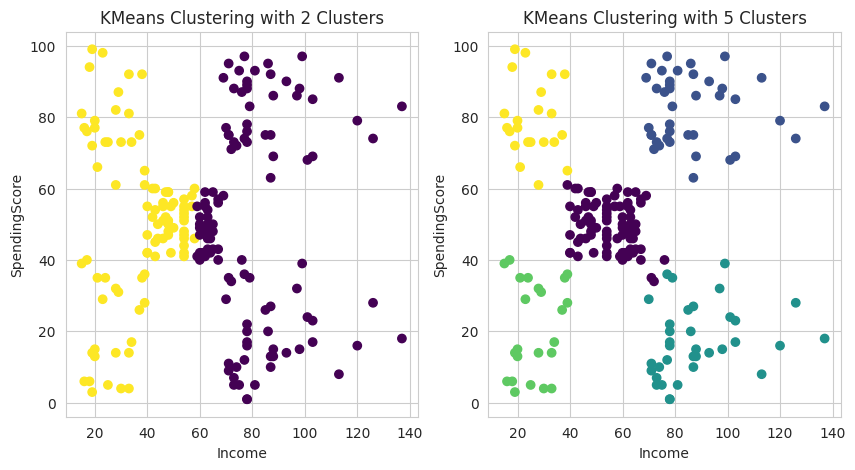

In [31]:
n_clusters = [2, 5]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i, ax in enumerate(axs):
    kmeans = KMeans(n_clusters=n_clusters[i], init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X[['Income', 'SpendingScore']])
    
    sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=y_kmeans, palette='viridis', ax=ax)
    ax.set_title(f'KMeans Clustering with {n_clusters[i]} Clusters')
    ax.set_xlabel('Income')
    ax.set_ylabel('SpendingScore')
    ax.get_legend().remove()  # Remove legend for clarity

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [36]:
import plotly.graph_objects as go

n_clusters = [2, 5]

fig = go.Figure()

for i in range(2):
    kmeans = KMeans(n_clusters=n_clusters[i], init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X[['Income', 'SpendingScore']])
    
    X['Cluster'] = y_kmeans
    
    fig.add_trace(go.Scatter3d(x=X['Income'], y=X['SpendingScore'], z=X['Cluster'], 
                                mode='markers', marker=dict(color=y_kmeans, size=5),
                                name=f'{n_clusters[i]} Clusters'))

fig.update_layout(scene=dict(xaxis_title='Income', yaxis_title='SpendingScore', zaxis_title='Cluster'),
                  title='Clustering with Different Number of Clusters',
                  width=1000, height=600)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.


When exploring agglomerative hierarchical clustering visually, starting with a minimum of 2 clusters helps to grasp the primary divisions within the dataset. To delve deeper into the hierarchical structure and finer details of the clustering, a maximum of 5 clusters can be considered. Increasing the number of clusters beyond this range allows for the identification of outliers and further granularity in partitioning, facilitating a more detailed analysis of the data.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


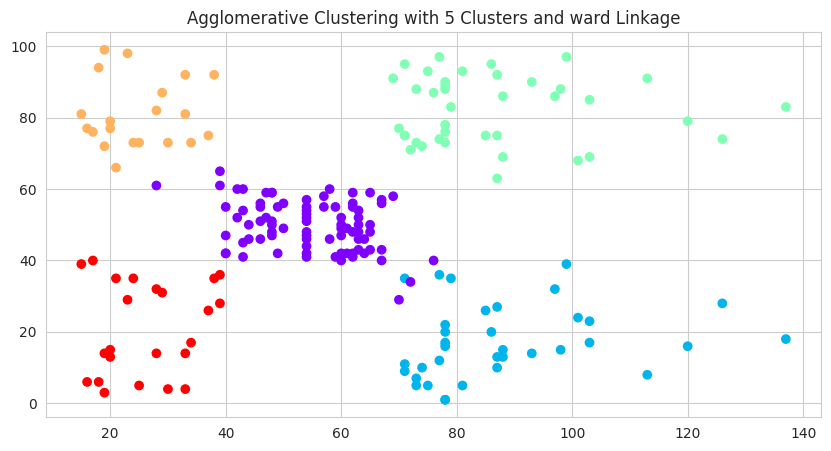

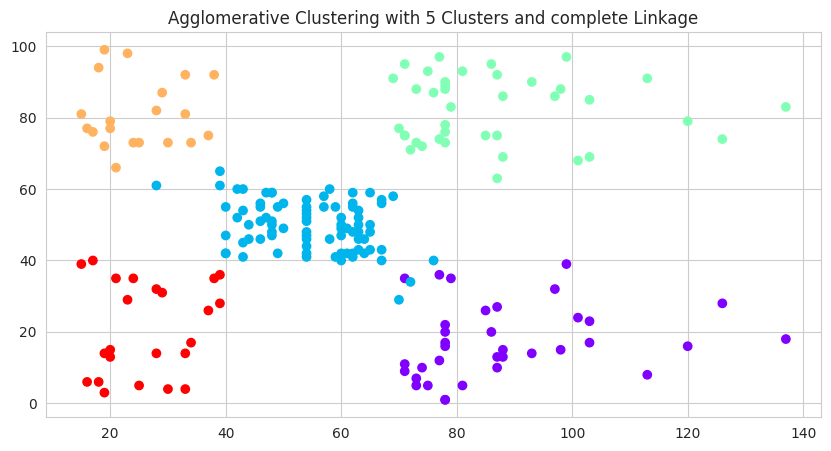

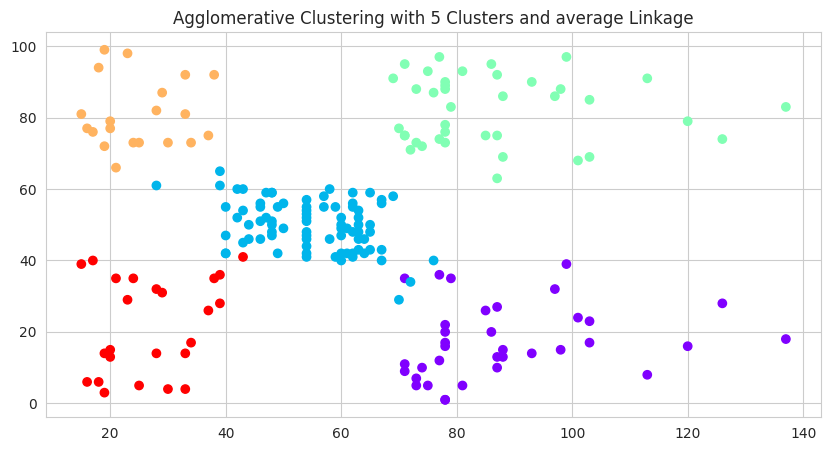

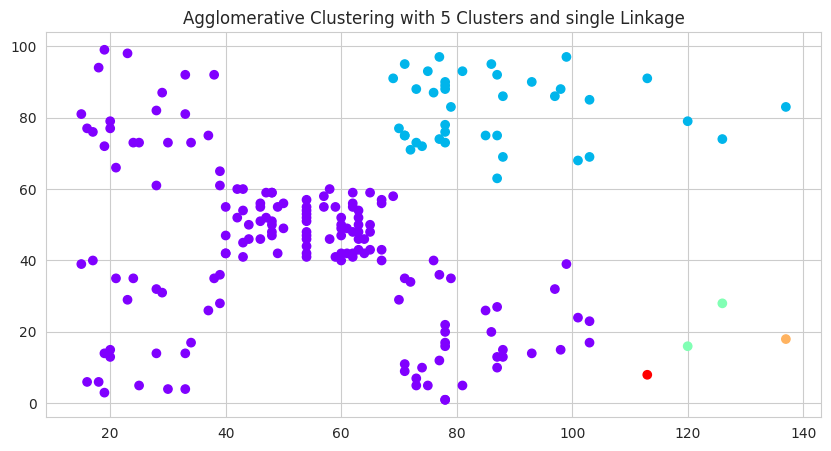

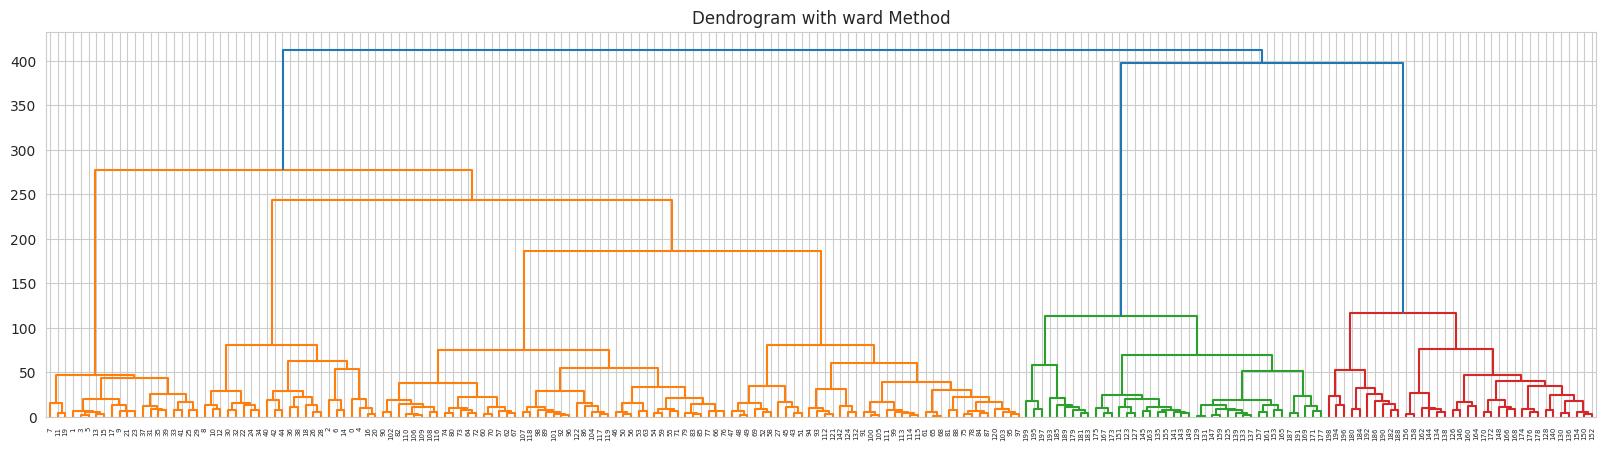

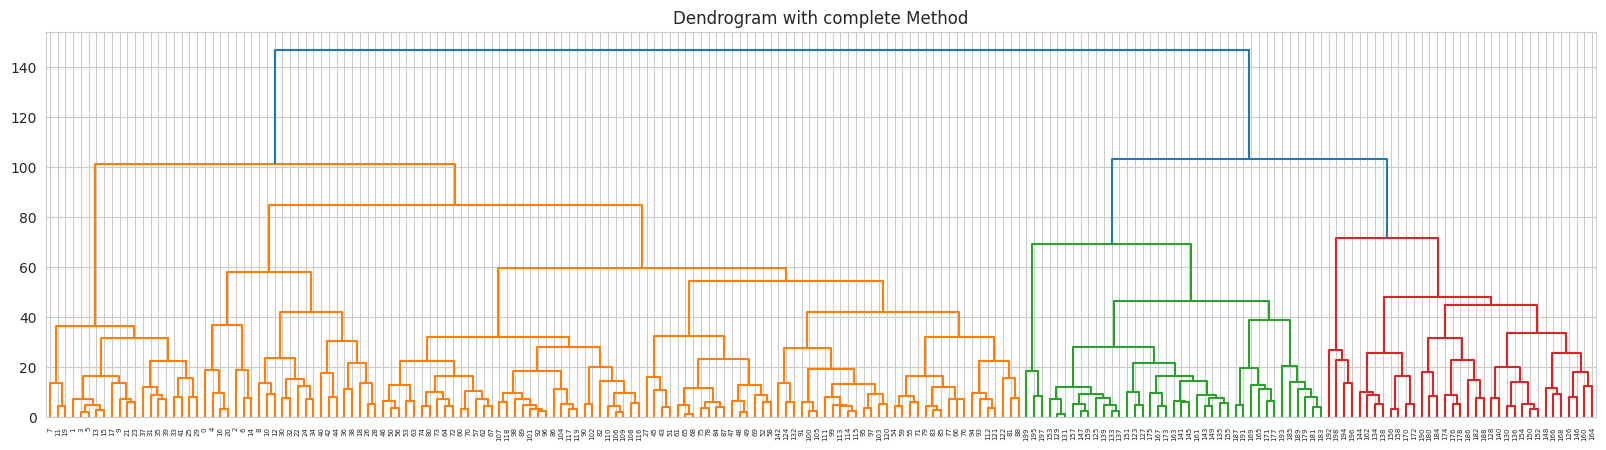

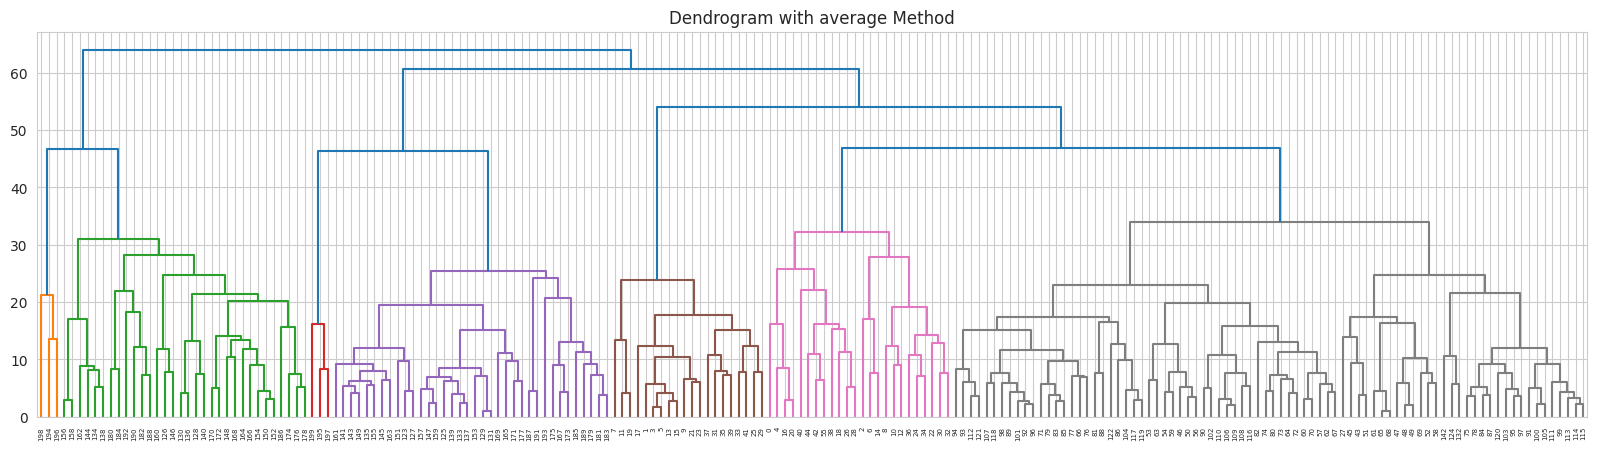

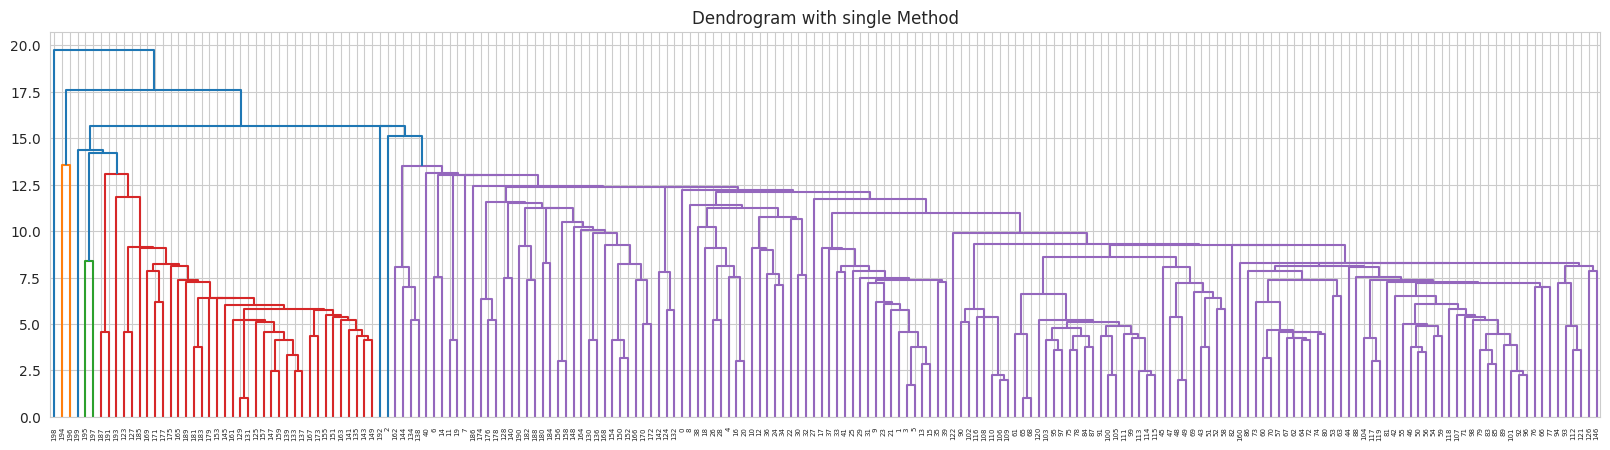

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_agglomerative_clusters(X, n_clusters, linkage_params):
    fig, axes = plt.subplots(len(linkage_params), 2, figsize=(15, 10))

    for i, link in enumerate(linkage_params):
        cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
        cluster_labels = cluster.fit_predict(X)

        axes[i, 0].scatter(X['Income'], X['SpendingScore'], c=cluster_labels, cmap='rainbow')
        axes[i, 0].set_title(f'Agglomerative Clustering with {n_clusters} Clusters and {link} Linkage')

        Z = linkage(X, method=link)
        dendrogram(Z, ax=axes[i, 1])
        axes[i, 1].set_title(f'Dendrogram with {link} Linkage')

    plt.tight_layout()
    plt.show()

n_clusters = 5
linkage_params = ['ward', 'complete', 'average', 'single']

plot_agglomerative_clusters(X, n_clusters, linkage_params)


**Висновки з завдання 12 (детальні)**

Ward linkage: This approach seems to offer a well-balanced clustering, with clusters formed based on the proximity of customer characteristics. The clusters are compact and evenly distributed.

Complete linkage: This method tends to introduce some diversity in cluster distribution, particularly when there's noticeable distance between groups of objects.

Average linkage: Results from this method resemble those of Ward linkage, though they may exhibit slightly less uniformity.

Single linkage: This method can result in elongated clusters, particularly evident when objects are closely linked in a chain-like fashion.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

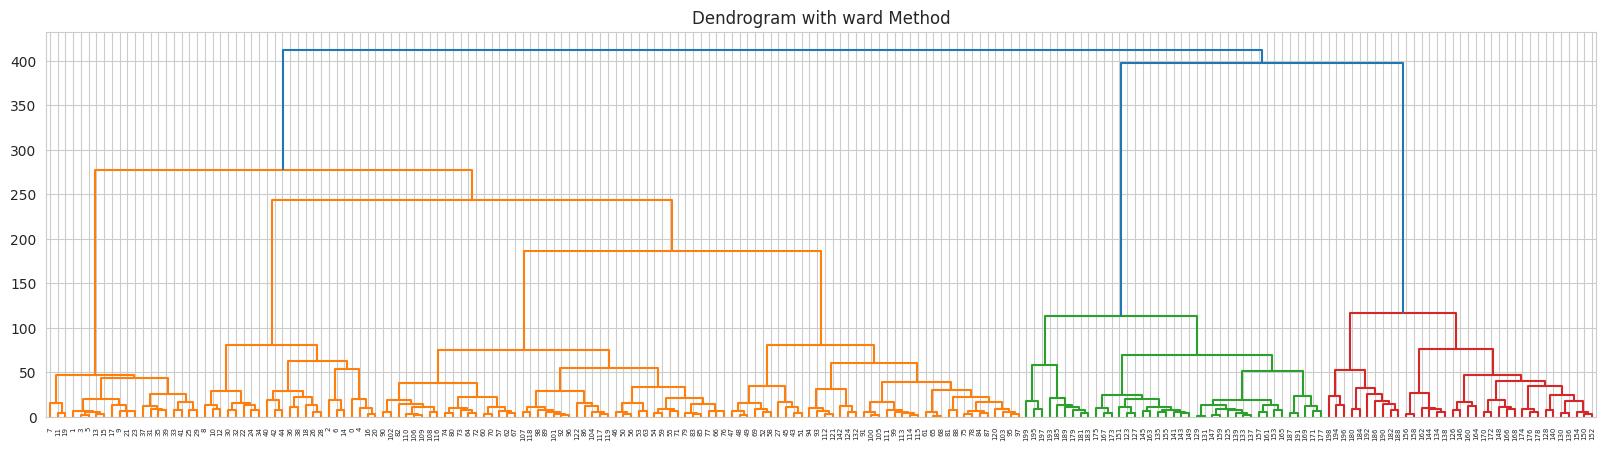

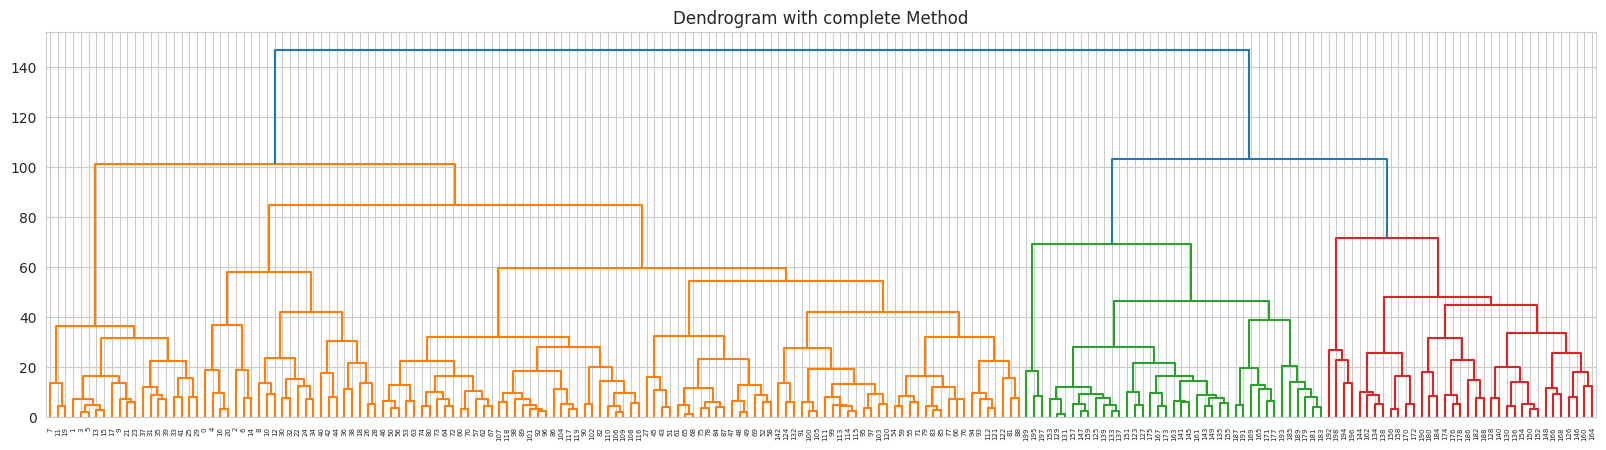

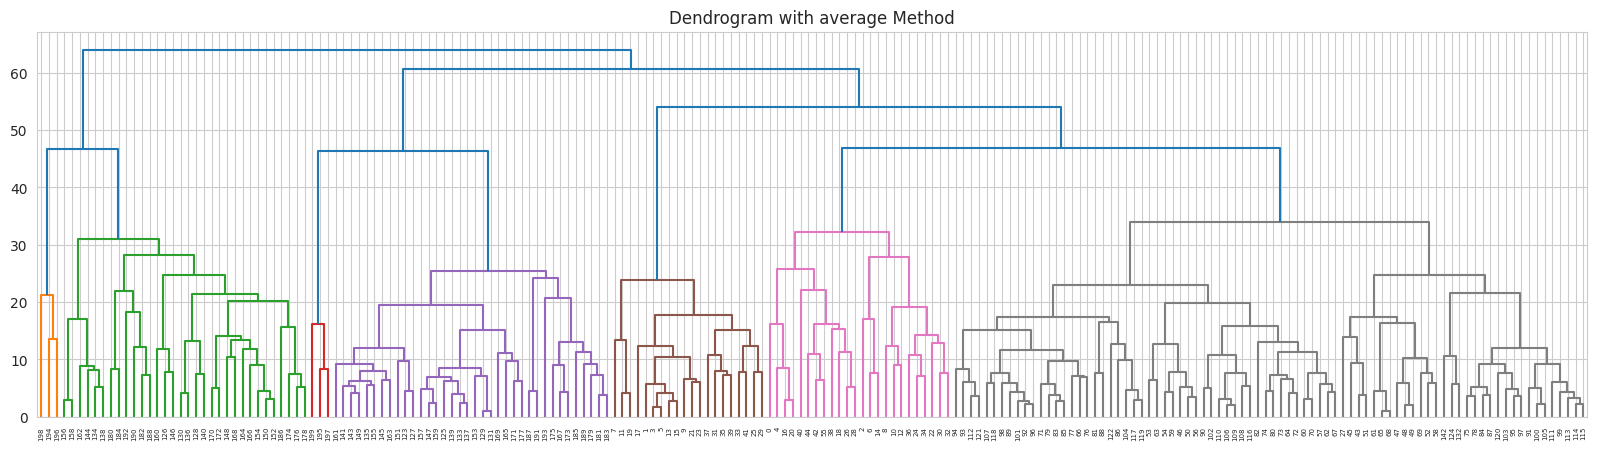

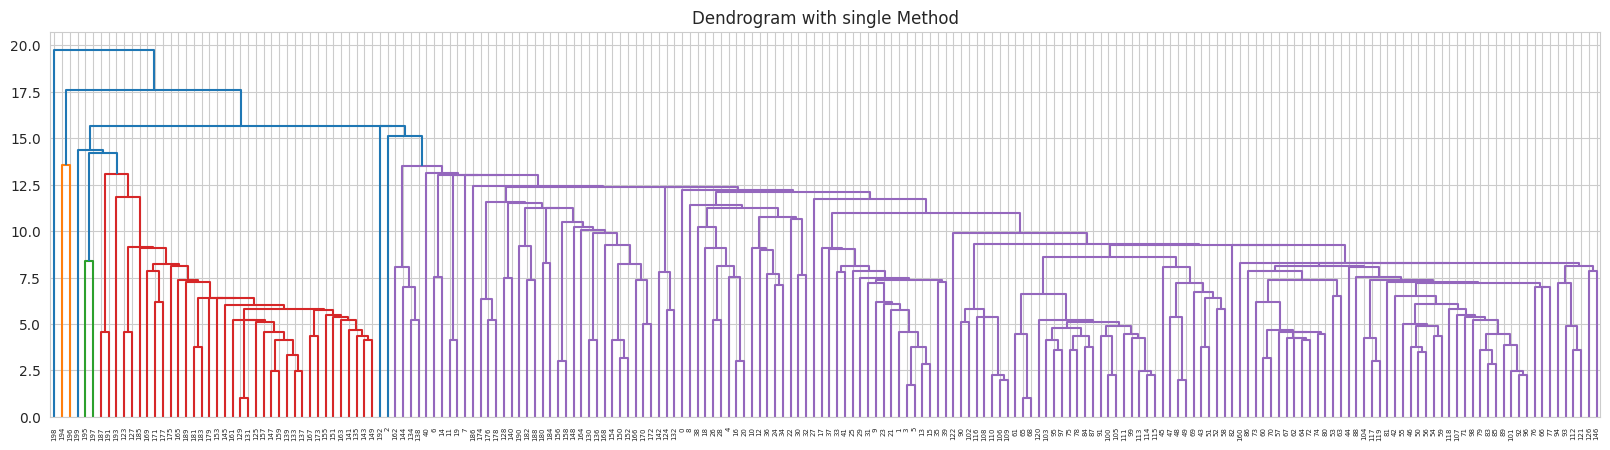

In [42]:
def plot_dendrogram_and_clusters(X, n_clusters, linkage_params):
    fig, axes = plt.subplots(len(linkage_params), figsize=(15, 8 * len(linkage_params)))

    for i, method in enumerate(linkage_params):
        Z = linkage(X, method=method)
        
        dendrogram(Z, ax=axes[i])
        axes[i].set_title(f'Dendrogram with {method} Method')
        
        labels = fcluster(Z, n_clusters, criterion='maxclust')

        # Plot scatter plot with clusters
        ax = axes[i].twinx()
        ax.scatter(X['Income'], X['SpendingScore'], c=labels, cmap='rainbow', alpha=0.6)
        ax.set_ylabel('Cluster Labels', color='blue')
        ax.tick_params(axis='y', labelcolor='blue')
        
    plt.tight_layout()
    plt.show()

n_clusters = 5
linkage_params = ['ward', 'complete', 'average', 'single']

plot_dendrogram_and_clusters(X, n_clusters, linkage_params)


**Висновки з завдання 13 (детальні)**

При зміні кліькості кластерів медот single найкраще показує різницю між змінами

Ward linkage: This method forms clusters by minimizing the variance within the clusters. On the dendrogram, we can see that it creates relatively compact clusters with a small number of objects in each. This can be useful if the data is structured according to this principle.

Complete linkage: This method joins two clusters that have the largest maximum distance between points. It can lead to the formation of quite large clusters, especially if they are somewhat different.